In [330]:
import numpy as np
import numpy.matlib
import matplotlib.pyplot as plt
from scipy.special import expit, logit, softmax

L = 200
sigma = 0.2
eta = 0.09

input = np.array([[-3],[-1],[1],[3]])
output = np.array([[0,0,0,1],[0,0,1,0],[0,1,0,0],[1,0,0,0]])



data_set_t = []
data_set_x = []
for i in range(L):
    n = numpy.random.randint(0,4)
    data_set_t.append(output[n])
    data_set_x.append(input[n])

#data_set_t_noise = data_set_t + sigma*np.random.randn(len(data_set_t),4)

data_set = np.hstack((data_set_x,data_set_t))

def der_sigmoid(x):
    return expit(-x) * (1-expit(-x))

percent_for_train = 0.8
amount = int(percent_for_train*len(data_set))

train_dataset = data_set[0:amount,:]
test_dataset = data_set[amount+1:,:]





In [331]:
W_ji= np.random.rand(3,2)
W_kj = np.random.rand(4,3)
np.ones(len(train_dataset[0,:]))
x = np.vstack((np.ones(len(train_dataset[:,0])),train_dataset[:,1].T))
# x = train_dataset[:,1].T
# x = np.reshape(x,(1,8))

In [332]:
W_ji= np.random.rand(3,2)
W_kj = np.random.rand(4,3)
np.ones(len(train_dataset[0,:]))
x = np.c_[np.ones(len(train_dataset[:,0])),train_dataset[:,0].T].T
W = []
d = []
for _ in range(1000):
    W.append(W_ji)
    # forward
    aj = np.dot(W_ji,x)
    zj = expit(aj)
    yk = np.dot(W_kj,zj)
    t_calc = softmax(yk,0)

    # backward
    dk = t_calc - train_dataset[:,1:].T
    dj = der_sigmoid(zj)*np.dot(W_kj.T,dk)
    W_ji = W_ji - eta*np.dot(dj,x.T)
    W_kj = W_kj - eta*np.dot(dk,zj.T)
    d.append(dk)


In [333]:
print(x[1,0])
print(t_calc[:,0])
print(train_dataset[0,1:].T)
print(np.argmax(t_calc[:,0]))
print(np.argmax(train_dataset[0,1:].T))

-1.0
[3.37446763e-04 7.43163374e-04 9.98919387e-01 2.87758932e-09]
[0 0 1 0]
2
2


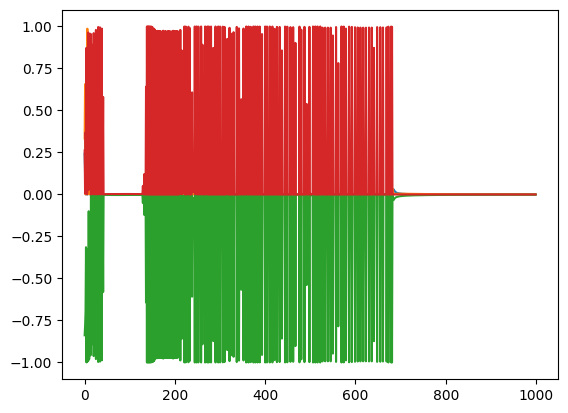

In [334]:
W = np.array(W)
d = np.array(d)
plt.plot(d[:,:,0])
#plt.plot(W[:,:,0])
#plt.plot(W[:,:,1])

Der er noget galt med at inputtet bestemmer om den siger det er 0100 ved 3 og -3 og  [0.25,0.25,0.25,0.25] ved 1 og -1

In [698]:
# Testing
x = np.vstack((np.ones(len(test_dataset[:,0])),test_dataset[:,0].T))
aj = np.dot(W_ji,x)
yk = np.dot(W_kj,zj)
t_calc = softmax(yk,0)

C:\Users\Morten\AppData\Local\Temp\ipykernel_17840\3924924127.py:6: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))


In [699]:
classification_errors = 0
t = test_dataset[:,1:].T
for i in range(len(t[0,:])):
    if np.argmax(t_calc[:,i]) == np.argmax(t[:,i]):
        # Succes!
        continue
    else:
        classification_errors = classification_errors + 1    

print(f'The number of classification errors with logistic regression is: {classification_errors} out of {len(t[0,:])} \nwhich is {classification_errors/len(t[0,:])*100}%')

The number of classification errors with logistic regression is: 7 out of 39 
which is 17.94871794871795%
